table of contents
1. 準備
1. トランジション数のトレンド
1. デュエルの回数

# 準備

In [1]:
import os, requests

import statsbomb as sb
import pandas as pd

import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)
import plotly.express as px

from tqdm import tqdm

import plotly.graph_objects as go

team_color_dict = {'AC Milan':'rgb(251,9,11)', 
                   'Liverpool':'rgb(200,16,46)', 
                   'Chelsea':'rgb(3,70,148)', 
                   'Manchester United':'rgb(218,41,28)', 
                   'Atlético Madrid':'rgb(39,46,97)',
                   'Borussia Dortmund':'rgb(253,225,0)',
#                    'Real Madrid':'rgb(254,190,16)',
                   'Real Madrid':'rgb(255,255,255)',
                   'Bayern Munich':'rgb(220,5,45)',
                   'Juventus':'rgb(0,0,0)',
                   'Barcelona':'rgb(0,77,152)',
                   'Inter Milan':'rgb(162,145,97)',
                   'Tottenham Hotspur':'rgb(19,34,87)',
                   'AS Monaco':'rgb(229,27,34)',
                   'FC Porto':'rgb(0,66,140)'
                  }

In [2]:
data_dir = os.path.join('..', 'data')

## データの読み込み

In [3]:
events_df = pd.read_csv(os.path.join(data_dir, 'events-cl_final.csv'))
matches_df = pd.read_csv(os.path.join(data_dir, 'matches-cl_final.csv'))

/Users/yamamuros83/.pyenv/versions/anaconda3-5.3.1/envs/spoana/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning:

Columns (31,33,43) have mixed types.Specify dtype option on import or set low_memory=False.



### 試合時間

In [8]:
matches_df['minutes'] = matches_df.apply(lambda xs: 120 if xs['home_score']==xs['away_score'] else 90, axis=1)
matches_df.at[5, 'minutes'] = 120

In [9]:
matches_df[['match_name', 'minutes']]

match_name  minutes
0       Tottenham Hotspur 0 vs 2 Liverpool       90
1             Real Madrid 3 vs 1 Liverpool       90
2              Juventus 1 vs 4 Real Madrid       90
3       Real Madrid 1 vs 1 Atlético Madrid      120
4                Juventus 1 vs 3 Barcelona       90
5       Real Madrid 4 vs 1 Atlético Madrid      120
6   Borussia Dortmund 1 vs 2 Bayern Munich       90
7             Bayern Munich 1 vs 1 Chelsea      120
8       Barcelona 3 vs 1 Manchester United       90
9         Bayern Munich 0 vs 2 Inter Milan       90
10      Barcelona 2 vs 0 Manchester United       90
11               AC Milan 2 vs 1 Liverpool       90
12               AC Milan 3 vs 3 Liverpool      120
13               AS Monaco 0 vs 3 FC Porto       90

# デュエル数

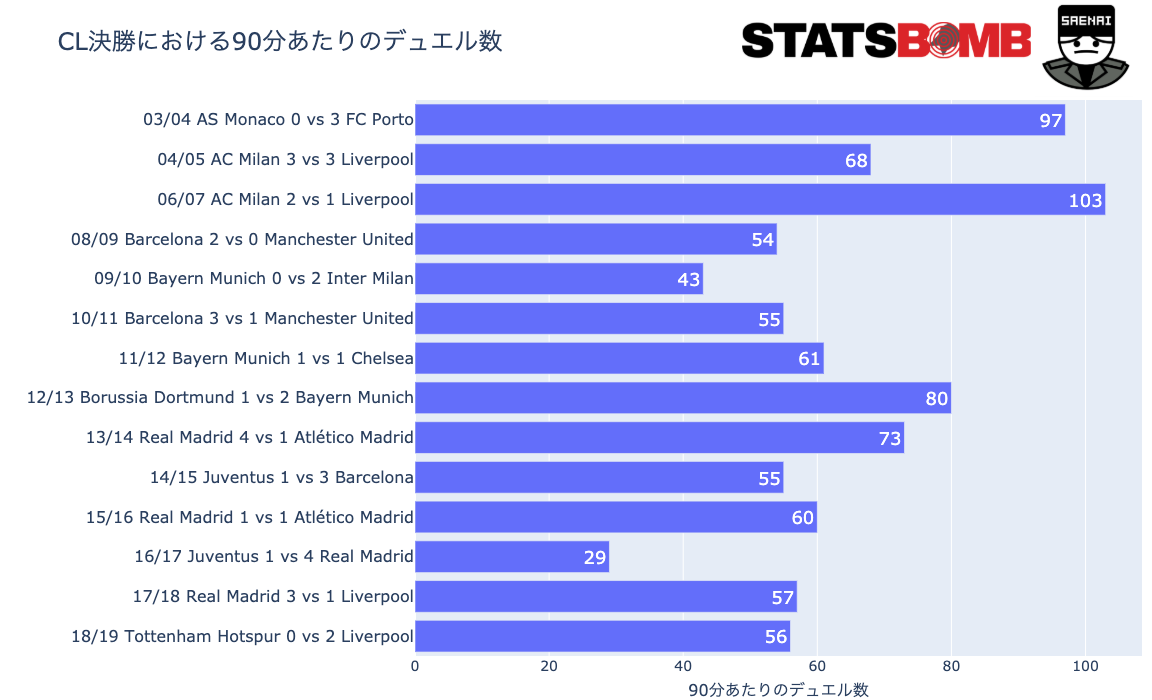

In [21]:
from PIL import Image

summary_df = events_df[(events_df.type_name=='Duel')].groupby(['match_id']).agg(cnt_duel=('id','count')).reset_index()
summary_df = pd.merge(summary_df, matches_df[[c for c in matches_df.columns if c=='minutes' or c.endswith('name') or c.endswith('id')]], on=['match_id'])

summary_df['cnt/90min'] = summary_df['cnt_duel'] / summary_df['minutes'] * 90
summary_df['match_name'] = summary_df['season_name'].str.replace('20','') + ' ' + summary_df['match_name']

fig = px.bar(
    summary_df.astype({'cnt/90min':int}),
    x='cnt/90min',
    y='match_name',
    orientation='h',
#     color='possession_team_name',
#     barmode='group',
    text='cnt/90min',
#     color_discrete_map=team_color_dict
)

fig.update_layout(
    font=dict(
        size=18
    ), 
    margin=dict(
        l=0,
        r=10,
        b=0,
        t=100
    ),
    title=dict(
#         text='CL決勝におけるチームごとの90分あたりのデュエル数',
        text='CL決勝における90分あたりのデュエル数',
        font=dict(
            size=24
        )
    ),
    height=700, width=1500,
    xaxis=dict(
        title='90分あたりのデュエル数',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='',
        titlefont_size=16,
        tickfont_size=16,
#         categoryorder='category ascending'
        categoryorder='category descending'
    ),
#     bargap=0.15, # gap between bars of adjacent location coordinates.
#     bargroupgap=0., # gap between bars of the same location coordinate.
    legend=dict(
        title=dict(font=dict(size=14)),
        font=dict(size=14),
    )
)

fig.add_layout_image(
   dict(
        source=Image.open(os.path.join('..', 'assets', 'statsbomb-logo.png')),
        xref="paper", yref="paper",
        x=0.85, y=1.075,
        sizex=0.4, sizey=0.4,
        xanchor="right", yanchor="bottom"
    )
)

fig.add_layout_image(
   dict(
        source=Image.open(os.path.join('..', 'assets', 'profile.JPG')),
        xref="paper", yref="paper",
        x=1, y=1.0,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

iplot(fig)
fig.write_image(os.path.join('..', 'reports', 'images', '3-number-of-duels.png'))

summary_df_duels = summary_df.copy()

### トランジション数

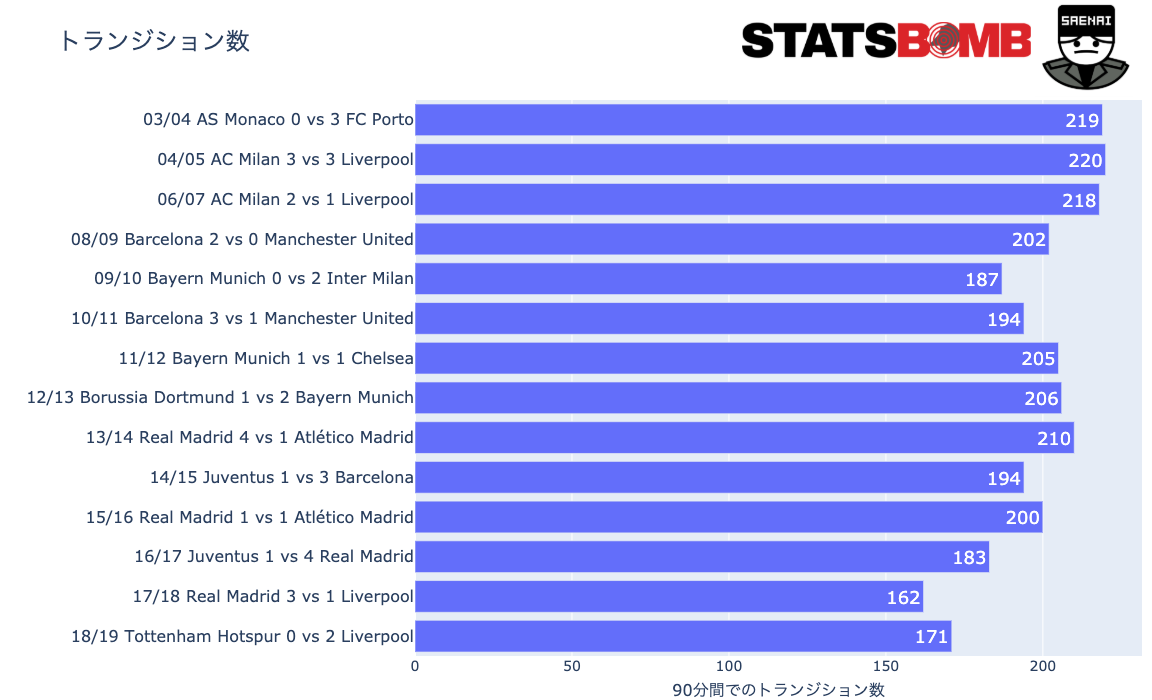

In [26]:
from PIL import Image

summary_df = events_df[events_df.period<=2].groupby(['match_id']).agg(cnt=('possession','max')).reset_index()
summary_df['cnt'] = summary_df.cnt -1
summary_df = pd.merge(summary_df, matches_df[[c for c in matches_df.columns if c.endswith('name') or c.endswith('id')]], on=['match_id'])

summary_df['match_name'] = summary_df['season_name'].str.replace('20','') + ' ' + summary_df['match_name']

fig = px.bar(
    summary_df,
    x='cnt',
    y='match_name',
    orientation='h',
#     color='possession_team_name',
#     barmode='group',
    text='cnt',
#     color_discrete_map=team_color_dict
)

fig.update_layout(
    font=dict(
        size=18
    ), 
    margin=dict(
        l=0,
        r=10,
        b=0,
        t=100
    ),
    title=dict(
        text='トランジション数',
        font=dict(
            size=24
        )
    ),
    height=700, width=1500,
    xaxis=dict(
        title='90分間でのトランジション数',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='',
        titlefont_size=16,
        tickfont_size=16,
#         categoryorder='category ascending'
        categoryorder='category descending'
    ),
#     bargap=0.15, # gap between bars of adjacent location coordinates.
#     bargroupgap=0., # gap between bars of the same location coordinate.
    legend=dict(
        title=dict(font=dict(size=14)),
        font=dict(size=14),
    )
)

fig.add_layout_image(
   dict(
        source=Image.open(os.path.join('..', 'assets', 'statsbomb-logo.png')),
        xref="paper", yref="paper",
        x=0.85, y=1.075,
        sizex=0.4, sizey=0.4,
        xanchor="right", yanchor="bottom"
    )
)

fig.add_layout_image(
   dict(
        source=Image.open(os.path.join('..', 'assets', 'profile.JPG')),
        xref="paper", yref="paper",
        x=1, y=1.0,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

iplot(fig)
fig.write_image(os.path.join('..', 'reports', 'images', '3-number-of-transitions.png'))

summary_df_transitions = summary_df.copy()

# 散布図

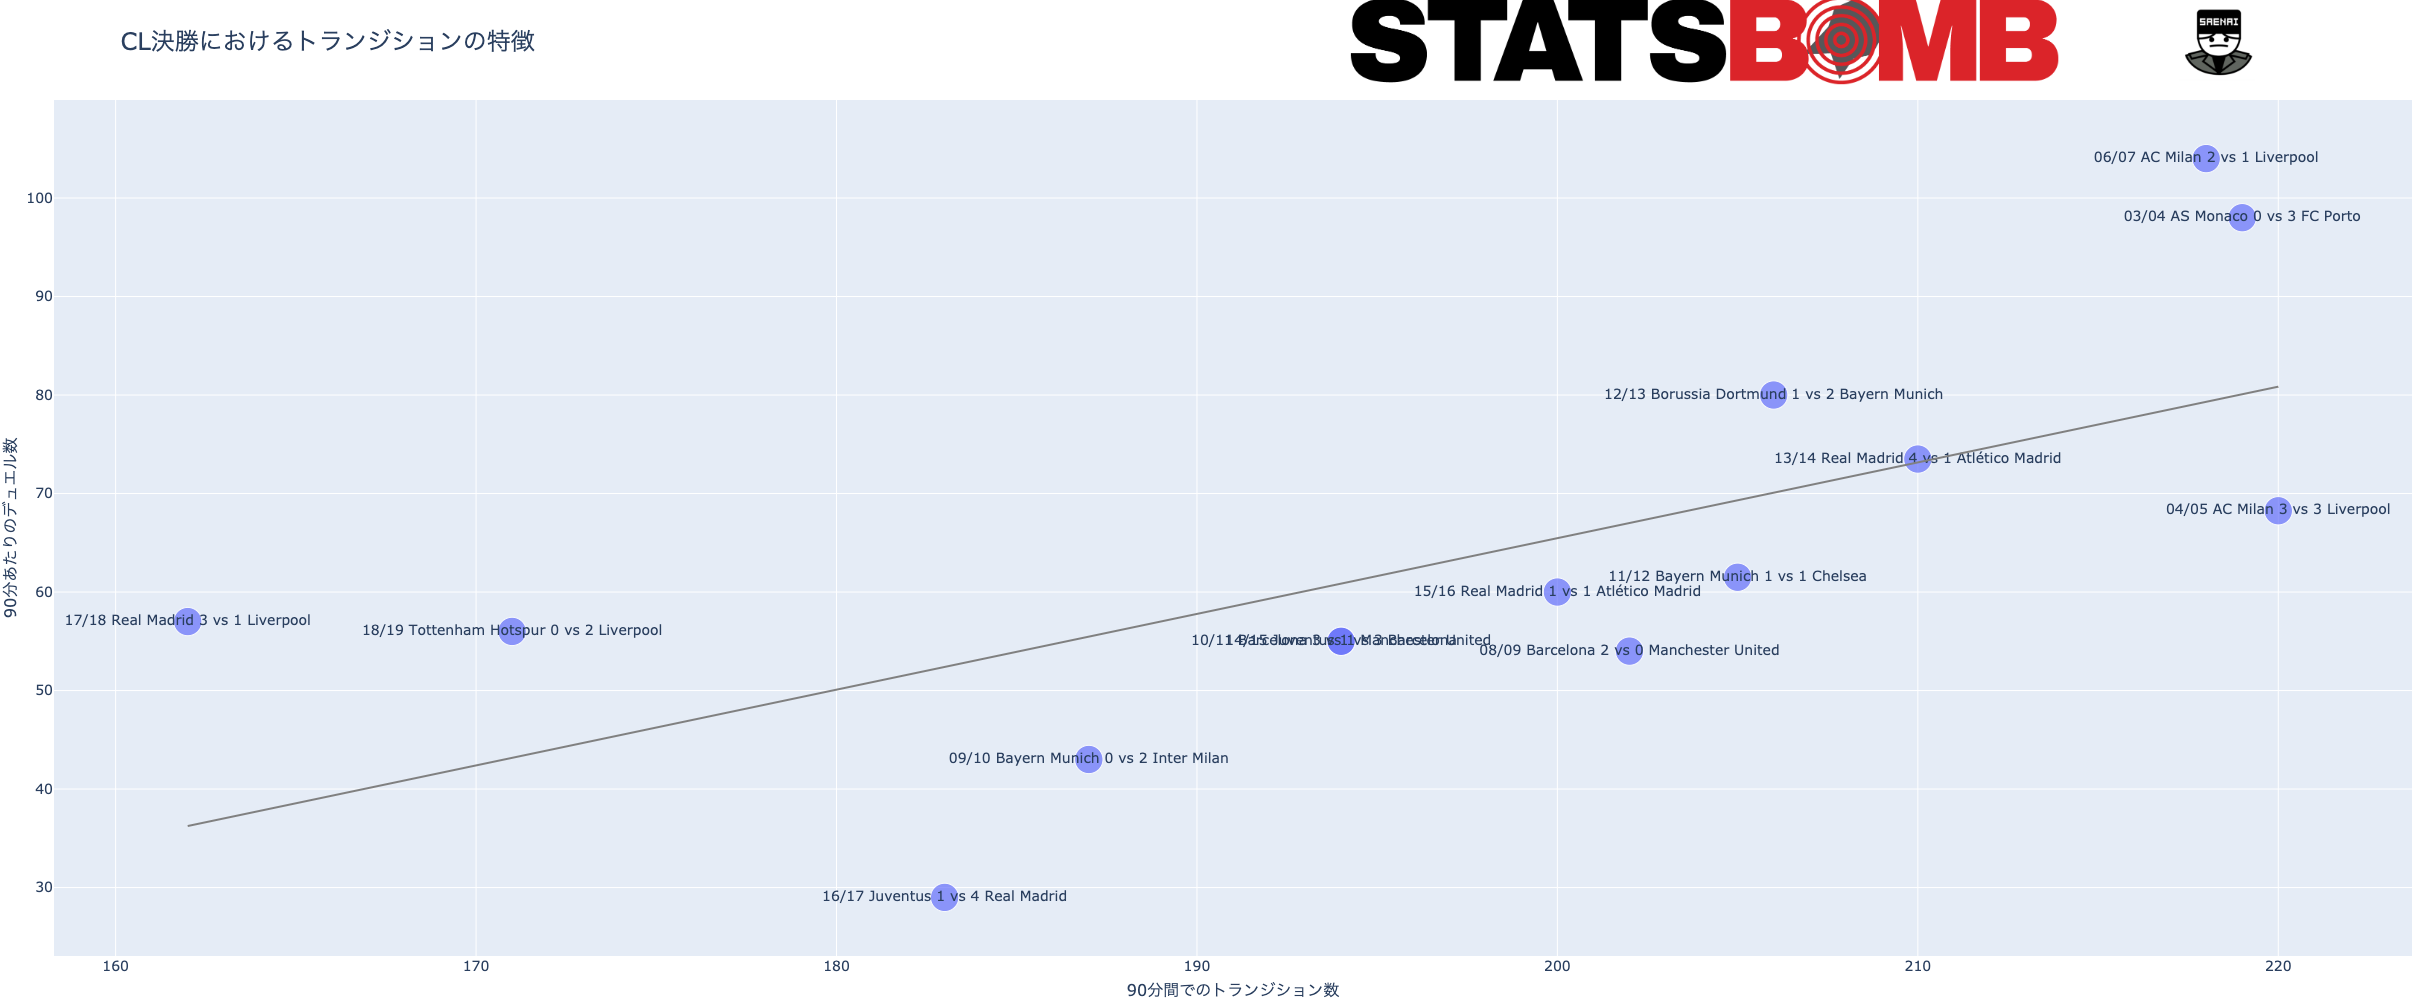

In [30]:
summary_df = pd.merge(summary_df_duels[['match_name', 'cnt/90min']], summary_df[['match_name', 'cnt']], on='match_name')

c_x, c_y = 'cnt', 'cnt/90min'
fig = px.scatter(
    summary_df,
    x=c_x,
    y=c_y,
    size=[45 for _ in range(len(summary_df))],
    text='match_name',
    trendline='ols',
    trendline_color_override='grey',
    height=1000, width=1500
)

# 回帰直線を引く
fig.update_layout(
    font=dict(
        size=14
    ), 
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=100
    ),
    title=dict(
        text='CL決勝におけるトランジションの特徴',
        font=dict(
            size=24
        )
    ),    
    xaxis=dict(
        title='90分間でのトランジション数',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='90分あたりのデュエル数',
        titlefont_size=16,
        tickfont_size=14,
#         categoryorder='category ascending'
        categoryorder='category descending'
    ),
    legend=dict(
        title=dict(font=dict(size=14)),
        font=dict(size=14),
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
       bgcolor="LightSteelBlue",
    )
)

fig.add_layout_image(
   dict(
        source=Image.open(os.path.join('..', 'assets', 'statsbomb-logo.png')),
        xref="paper", yref="paper",
        x=0.85, y=1.07,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="middle"
    )
)

fig.add_layout_image(
   dict(
        source=Image.open(os.path.join('..', 'assets', 'profile.JPG')),
        xref="paper", yref="paper",
        x=0.9, y=1.07,
        sizex=0.1, sizey=0.1,
        xanchor="left", yanchor="middle"
    )
)

iplot(fig)
fig.write_image(os.path.join('..', 'reports', 'images', '3-scatter-transitions.png'))